<a href="https://colab.research.google.com/github/acollin19/comp551_A1/blob/main/assignment1_group-24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Process:

### Task 1: Preprocessing
1. Hepatitis dataset
2. Diabetic Retinopathy Debrecen dataset
3. Basic statistics

### Task 2: Implementing KNN and DT
1. KNN
2. DT

### Task 3: Running Experiments
1. Dataset 1: Hepatitis
2. Dataset 2: Diabetic Retinopathy Debrecen

* Compare accuracy
* Different K values
* Max tree depth
* Different distance/costs
* Plots
* Key features in DT
* Key features in KNN

In [ ]:
import pandas as pd
import numpy as np
import math
# from math import sqrt
from sklearn.model_selection import train_test_split
import scipy.spatial
from scipy.io import arff
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
np.random.seed(420)

## Task 1: Preprocessing

## Task 1.1: Hepatitis Dataset

In [ ]:
# Loading/cleaning datasets

hepatitis = pd.read_csv("hepatitis.data", header=None)
hepatitis = hepatitis[(hepatitis != '?').all(axis=1)]
hepatitis = hepatitis.dropna().reset_index(drop=True)
hepatitis = hepatitis.apply(pd.to_numeric)
hepatitis.columns = ['CLASS','AGE','SEX','STEROID','ANTIVIRAL','FATIGUE','MALAISE','ANOREXIA',
            'LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES',
            'BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
hepatitis.head()

,CLASS,AGE,SEX,STEROID,ANTIVIRAL,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
1,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.3,78,30,4.4,85,1
2,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.0,59,249,3.7,54,1
3,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.9,81,60,3.9,52,1
4,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1


In [ ]:
# Hepatitis Dataset
X_hepatitis = hepatitis.iloc[:, hepatitis.columns != 'CLASS'].values # x -> features (1-19)
y_hepatitis = hepatitis.iloc[:, 0].values # y -> class label (0)
display(X_hepatitis)

array([[34. ,  1. ,  2. , ...,  4. , 75. ,  1. ],
       [39. ,  1. ,  1. , ...,  4.4, 85. ,  1. ],
       [32. ,  1. ,  2. , ...,  3.7, 54. ,  1. ],
       ...,
       [31. ,  1. ,  1. , ...,  4.2, 54. ,  2. ],
       [53. ,  2. ,  1. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

## Task 1.2: Diabetic Retinopathy Debrecen Dataset

In [ ]:
data = arff.loadarff('messidor_features.arff')
diabetic = pd.DataFrame(data[0])
diabetic.to_csv(index=False)
diabetic = diabetic[(diabetic != '?').all(axis=1)]
diabetic = diabetic.dropna().reset_index(drop=True)
diabetic = diabetic.apply(pd.to_numeric)
diabetic.columns = ["QUALITY", "PRESCREENING", "MA_1", "MA_2", "MA_3", "MA_4", "MA_5", "MA_6",
                    "EXUDATES_8", "EXUDATES_9", "EXUDATES_10", "EXUDATES_11", "EXUDATES_12", "EXUDATES_13", "EXUDATES_14", "EXUDATES_15",
                    "EUCLIDEAN_DIST", "OPTIC_DISC_DIAM", "AM_FM", "CLASS"]
diabetic.head()


,QUALITY,PRESCREENING,MA_1,MA_2,MA_3,MA_4,MA_5,MA_6,EXUDATES_8,EXUDATES_9,EXUDATES_10,EXUDATES_11,EXUDATES_12,EXUDATES_13,EXUDATES_14,EXUDATES_15,EUCLIDEAN_DIST,OPTIC_DISC_DIAM,AM_FM,CLASS
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1


In [ ]:
# Messidor features dataset
X_diabetic = diabetic.iloc[:,:-1].values # x -> features (0-18)
y_diabetic = diabetic.iloc[:,-1].values # y -> class label (19)
display(X_diabetic)

array([[ 1.      ,  1.      , 22.      , ...,  0.486903,  0.100025,
         1.      ],
       [ 1.      ,  1.      , 24.      , ...,  0.520908,  0.144414,
         0.      ],
       [ 1.      ,  1.      , 62.      , ...,  0.530904,  0.128548,
         0.      ],
       ...,
       [ 1.      ,  0.      , 49.      , ...,  0.560632,  0.129843,
         0.      ],
       [ 1.      ,  1.      , 39.      , ...,  0.485972,  0.10669 ,
         1.      ],
       [ 1.      ,  1.      ,  7.      , ...,  0.556192,  0.088957,
         0.      ]])

## Task 1.3 : Basic Statistics

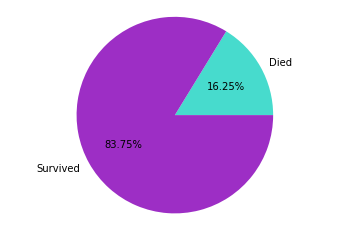

In [ ]:
# Positive vs. Negative Examples for Hepatitis Dataset

hep_died = np.sum(y_hepatitis == 1)/y_hepatitis.shape[0]

plt.pie([hep_died, 1-hep_died], labels=['Died', 'Survived'], colors=["#47DBCD", "#9D2EC5"], autopct='%1.2f%%')
plt.axis('equal')
plt.show()

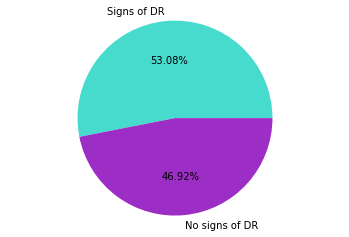

In [ ]:
# Positive vs. Negative Examples for Messidor Dataset

diab_pos = np.sum(y_diabetic == 1)/y_diabetic.shape[0]

plt.pie([diab_pos, 1-diab_pos], labels=['Signs of DR', 'No signs of DR'], colors=["#47DBCD", "#9D2EC5"], autopct='%1.2f%%')
plt.axis('equal')
plt.show()

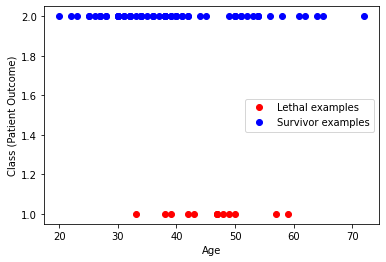

In [ ]:
# Age vs. Class for Hepatitis Dataset

plt.clf()
positive_trai = y_hepatitis==1
negative_trai = y_hepatitis==2

plt.plot(X_hepatitis[positive_trai,0],y_hepatitis[positive_trai],"or",label="Lethal examples")
plt.plot(X_hepatitis[negative_trai,0],y_hepatitis[negative_trai],"ob",label="Survivor examples")

plt.xlabel("Age")
plt.ylabel("Class (Patient Outcome)")
plt.legend(loc='best')
plt.show()

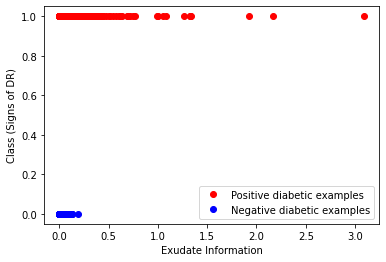

In [ ]:
# Exudate Information (at Confidence Level alpha=1) vs. Class for Messidor Dataset

plt.clf()
positive_trai = y_diabetic==1
negative_trai = y_diabetic==0

plt.plot(X_diabetic[positive_trai, 15],y_diabetic[positive_trai],"or",label="Positive diabetic examples")
plt.plot(X_diabetic[negative_trai, 15],y_diabetic[negative_trai],"ob",label="Negative diabetic examples")

plt.xlabel("Exudate Information")
plt.ylabel("Class (Signs of DR)")
plt.legend(loc='best')
plt.show()

## Task 2.1 : K-Nearest Neighbour


In [ ]:
# Modified class collab KNN implemetation 
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1)) # Euclidean Distance Function
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1) # Manhattan Distance Function

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

    # # Evaluating prediction accuracy on true and target labels
    def evaluate_acc(self, X_train, y_train, X_test, y_test):
        #test accuracy
        y_test_prob, knns = self.fit(X_train, y_train).predict(X_test)
        y_test_pred = np.argmax(y_test_prob, axis=-1)
        test_acc = np.sum(y_test_pred == y_test)/y_test.shape[0]

        #train accuracy  
        y_train_prob, knns = self.fit(X_train, y_train).predict(X_train)
        y_train_pred = np.argmax(y_train_prob, axis=-1)
        train_acc = np.sum(y_train_pred==y_train)/y_train.shape[0]

        return train_acc, test_acc

## Task 2.2 : Decision Trees

In [ ]:
class Node:
  def __init__(self, indices, parent):
    self.indices = indices
    self.left = None
    self.right = None
    self.feature = None
    self.threshold = None

    if parent:
      self.data = parent.data
      self.depth = parent.depth + 1
      self.labels = parent.labels                                          # eg. [0, 1, 0, 0, ..., 1, 0]
      class_count = np.bincount(self.labels[indices], minlength=3)         # eg. [35, 55]
      self.class_probs = class_count / np.sum(class_count)                 # eg. [35/90, 55/90]

In [ ]:
def misclassification_cost(labels):
  class_probs = np.bincount(labels) / len(labels)
  return min(class_probs)

def entropy_cost(labels):
  class_probs = np.bincount(labels) / len(labels)
  class_probs = class_probs[class_probs > 0]
  return -np.sum(class_probs * np.log2(class_probs))

def gini_cost(labels):
  class_probs = np.bincount(labels) / len(labels)
  return 1 - np.sum(np.square(class_probs))


In [ ]:
def greedy(node, cost_fn):
  best_cost = np.inf
  best_feature, best_value = None, None
  num_instances, num_features = node.data.shape

  data_sorted = np.sort(node.data[node.indices], axis=0)
  candidates = (data_sorted[1:] + data_sorted[:-1]) / 2

  for d in range(num_features):
    data_d = node.data[node.indices, d]
    for test in candidates[:,d]:
      left_indices = node.indices[data_d <= test]
      right_indices = node.indices[data_d > test]

      if len(left_indices) == 0 or len(right_indices) == 0:                
        continue

      left_cost = cost_fn(node.labels[left_indices])
      right_cost = cost_fn(node.labels[right_indices])
      num_left, num_right = left_indices.shape[0], right_indices.shape[0]
      cost = (num_left * left_cost + num_right * right_cost)/num_instances

      if cost < best_cost:
        best_cost = cost
        best_feature = d
        best_value = test

  return best_cost, best_feature, best_value 

In [ ]:
class DecisionTree:
  def __init__(self, max_depth=3, min_leaf_instances=1, cost_fn=misclassification_cost):
    self.max_depth = max_depth
    self.root = None
    self.num_classes = 2
    self.min_leaf_instances = min_leaf_instances
    self.cost_fn = cost_fn

  def fit(self, data, labels):
    self.data = data
    self.labels = labels
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.depth = 0
    self._fit_tree(self.root)
    return self

  def _fit_tree(self, node):
    if node.depth == self.max_depth or len(node.indices) <= self.min_leaf_instances:
      return

    cost, split_feature, split_value = greedy(node, self.cost_fn)
    if np.isinf(cost): 
      return
    
    test = node.data[node.indices,split_feature] <= split_value
    node.feature = split_feature
    node.threshold = split_value
  
    left = Node(node.indices[test], node)
    right = Node(node.indices[np.logical_not(test)], node)

    self._fit_tree(left)
    self._fit_tree(right)

    node.left = left
    node.right = right

  def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], 3))
    for n, x in enumerate(data_test):
      node = self.root
      while node.left:
        if x[node.feature] <= node.threshold:
          node = node.left
        else:
          node = node.right
      class_probs[n,:] = node.class_probs
    return class_probs

  def evaluate_acc(self, X_train, y_train, X_test, y_test):
    #train accuracy  
    y_train_prob = self.fit(X_train, y_train).predict(X_train)
    y_train_pred = np.argmax(y_train_prob, axis=-1)
    train_acc = np.sum(y_train_pred==y_train)/y_train.shape[0]

    #test accuracy
    y_test_prob = self.fit(X_train, y_train).predict(X_test)
    y_test_pred = np.argmax(y_test_prob, axis=-1)
    test_acc = np.sum(y_test_pred == y_test)/y_test.shape[0]

    return train_acc, test_acc

## Task 3a : Hepatitis Experiments

In [ ]:
# Split Training and Testing with sklearn
X_train, X_test, y_train, y_test = train_test_split(X_hepatitis, y_hepatitis, test_size = 0.2, random_state=1, shuffle=True)
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 64
Total Number of rows in test: 16


In [ ]:
# KNN on Hepatitis Dataset with K = 5

model = KNN(5, dist_fn = euclidean)
train_acc, test_acc = model.evaluate_acc(X_train, y_train, X_test, y_test)

print(f'Training Accuracy for K=5: {train_acc}')
print(f'Testing Accuracy for K=5: {test_acc}')

Training Accuracy for K=5: 0.84375
Testing Accuracy for K=5: 0.75


In [ ]:
# DT on Hepatitis Dataset with max_depth = 10

tree = DecisionTree(max_depth=10, cost_fn=entropy_cost)
train_acc, test_acc = tree.evaluate_acc(X_train, y_train, X_test, y_test)

print(f'Training Accuracy for max_depth=10: {train_acc}')
print(f'Testing Accuracy for max_depth=10: {test_acc}')

Training Accuracy for max_depth=10: 1.0
Testing Accuracy for max_depth=10: 0.75


best K = 5, test accuracy = 0.75


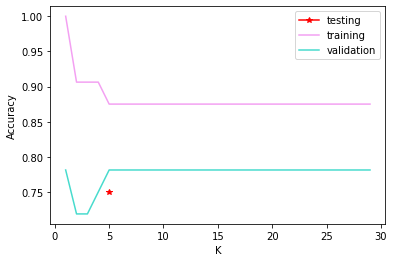

In [ ]:
# Finding best hyperparameter K using 50/50 training/validation split

def best_k_validation(X_train, y_train, X_test, y_test):
    n = X_train.shape[0] // 2
    X_tr, y_tr = X_train[n:], y_train[n:]
    X_valid, y_valid = X_train[:n], y_train[:n]

    model_choices=[]
    train_accs = []
    valid_accs = []

    # Iterate through loop to find best K value
    for k in range(1,30):
        knn = KNN(K=k) 
        model_choices.append(k)
        train_acc, valid_acc = knn.evaluate_acc(X_tr, y_tr, X_valid, y_valid)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

    best_valid_K = model_choices[valid_accs.index(max(valid_accs), 1)]
    knn = KNN(K=best_valid_K)
    # y_test_prob, _ = knn.fit(X_tr, y_tr).predict(X_test)
    # y_test_pred = np.argmax(y_test_prob, axis=-1)
    # test_accuracy = np.sum(y_test_pred == y_test)/y_test.shape[0]
    _, test_accuracy = knn.evaluate_acc(X_train, y_train, X_test, y_test)

    return (model_choices, best_valid_K, train_accs, valid_accs, test_accuracy)

model_choices, best_valid_K, train_accs, valid_accs, test_accuracy = best_k_validation(X_train, y_train, X_test, y_test)
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, valid_accs, color='#47DBCD', label='validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best K = 9, train accuracy = 0.828125, test accuracy = 0.875


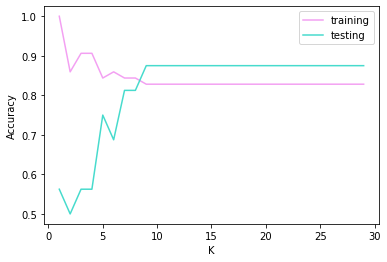

In [ ]:
# Evaluating every K to find true best result

def best_k_testing(X_train, y_train, X_test, y_test):
    model_choices=[]
    train_accs = []
    test_accs = []

    # Iterate through loop to find best K value
    for k in range(1,30):
        knn = KNN(K=k) 
        model_choices.append(k)
        train_acc, test_acc = knn.evaluate_acc(X_train, y_train, X_test, y_test)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

    best_valid_K = model_choices[test_accs.index(max(test_accs))]

    return (model_choices, best_valid_K, train_accs, test_accs)

model_choices, best_valid_K, train_accs, test_accs = best_k_testing(X_train, y_train, X_test, y_test)
print(f'best K = {best_valid_K}, train accuracy = {train_accs[best_valid_K-1]}, test accuracy = {test_accs[best_valid_K-1]}')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, test_accs, color='#47DBCD', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best d = 3, test accuracy = 0.8125


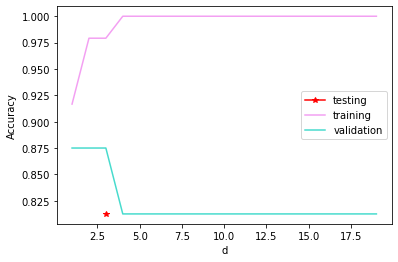

In [ ]:
# Finding best hyperparameter d using 75/25 training/validation split

def best_depth_validation(X_train, y_train, X_test, y_test):
  n = X_train.shape[0] // 4
  X_tr, y_tr = X_train[:3*n], y_train[:3*n]
  X_valid, y_valid = X_train[3*n:], y_train[3*n:]

  model_choices=[]
  train_accs = []
  valid_accs = []

  # Iterate through loop to find best depth value
  for d in range(1,20):
      tree = DecisionTree(max_depth=d, cost_fn=gini_cost) 
      model_choices.append(d)
      train_acc, valid_acc = tree.evaluate_acc(X_tr, y_tr, X_valid, y_valid)
      train_accs.append(train_acc)
      valid_accs.append(valid_acc)

  best_valid_d = model_choices[np.argwhere(valid_accs == np.amax(valid_accs))[-1][0]]
  tree = DecisionTree(max_depth=best_valid_d, cost_fn=gini_cost)
  _, test_accuracy = tree.evaluate_acc(X_train, y_train, X_test, y_test)

  return (model_choices, best_valid_d, train_accs, valid_accs, test_accuracy)

model_choices, best_valid_d, train_accs, valid_accs, test_accuracy = best_depth_validation(X_train, y_train, X_test, y_test)
print(f'best d = {best_valid_d}, test accuracy = {test_accuracy}')
plt.plot(best_valid_d, test_accuracy, marker='*', color='red', label='testing')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, valid_accs, color='#47DBCD', label='validation')
plt.xlabel("d")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best d = 3, train accuracy = 0.96875, test accuracy = 0.8125


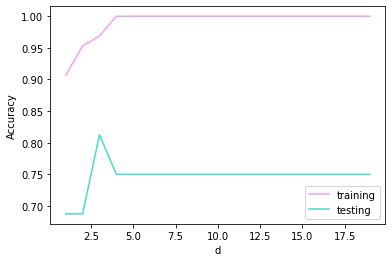

In [ ]:
# Evaluating every d to find true best result

def best_depth_testing(X_train, y_train, X_test, y_test):
  model_choices=[]
  train_accs = []
  test_accs = []

  # Iterate through loop to find best depth value
  for d in range(1,20):
      tree = DecisionTree(max_depth=d, cost_fn=gini_cost) 
      model_choices.append(d)
      train_acc, test_acc = tree.evaluate_acc(X_train, y_train, X_test, y_test)
      train_accs.append(train_acc)
      test_accs.append(test_acc)

  best_valid_d = model_choices[test_accs.index(max(test_accs))]

  return (model_choices, best_valid_d, train_accs, test_accs)

model_choices, best_valid_d, train_accs, test_accs = best_depth_testing(X_train, y_train, X_test, y_test)
print(f'best d = {best_valid_d}, train accuracy = {train_accs[best_valid_d-1]}, test accuracy = {test_accs[best_valid_d-1]}')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, test_accs, color='#47DBCD', label='testing')
plt.xlabel("d")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

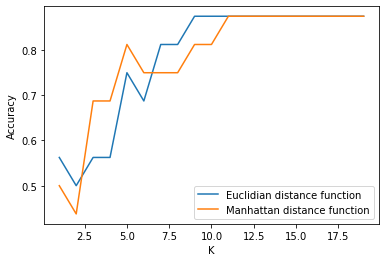

In [ ]:
# Different Distance Functions for KNN

list_K = [i for i in range(1, 20)]
list_acc_euc = []
list_acc_man = []

for k in range(1, 20):
  knn = KNN(K=k, dist_fn=euclidean)
  _, test_acc_euc = knn.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_euc.append(test_acc_euc)
  
  knn = KNN(K=k, dist_fn=manhattan)
  _, test_acc_man = knn.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_man.append(test_acc_man)

plt.plot(list_K, list_acc_euc, label="Euclidian distance function")
plt.plot(list_K, list_acc_man, label="Manhattan distance function")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

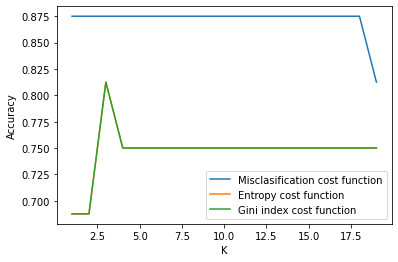

In [ ]:
# Different Cost Functions for DT

list_d = [i for i in range(1, 20)]
list_acc_misc = []
list_acc_entr = []
list_acc_gini = []

for d in range(1, 20):
  tree = DecisionTree(max_depth=d, cost_fn=misclassification_cost)
  _, test_acc_misc = tree.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_misc.append(test_acc_misc)

  tree = DecisionTree(max_depth=d, cost_fn=entropy_cost)
  _, test_acc_entr = tree.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_entr.append(test_acc_entr)

  tree = DecisionTree(max_depth=d, cost_fn=gini_cost)
  _, test_acc_gini = tree.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_gini.append(test_acc_gini)

plt.plot(list_d, list_acc_misc, label="Misclasification cost function")
plt.plot(list_d, list_acc_entr, label="Entropy cost function")
plt.plot(list_d, list_acc_gini, label="Gini index cost function")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Find most relevant features
cor_target = abs(hepatitis.corr()["CLASS"])
print(cor_target[cor_target > 0.25])

CLASS        1.000000
MALAISE      0.275595
SPIDERS      0.287839
ASCITES      0.479211
VARICES      0.345785
BILIRUBIN    0.351557
ALBUMIN      0.477404
PROTIME      0.395386
HISTOLOGY    0.456856
Name: CLASS, dtype: float64


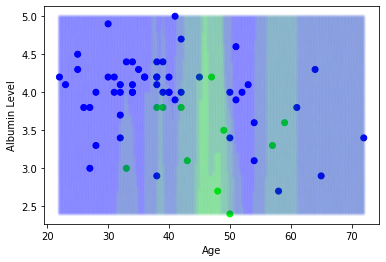

In [ ]:
# Decision Boundaries for Hepatitis: KNN

x0v = np.linspace(np.min(X_train[:,0]), np.max(X_train[:,0]), 200)
x1v = np.linspace(np.min(X_train[:,16]), np.max(X_train[:,16]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = KNN(K=5)
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all, _ = model.fit(X_train[:,[0,16]], y_train).predict(x_all)
plt.scatter(X_train[:,0], X_train[:,16], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.05)
plt.xlabel("Age")
plt.ylabel("Albumin Level")
plt.show()

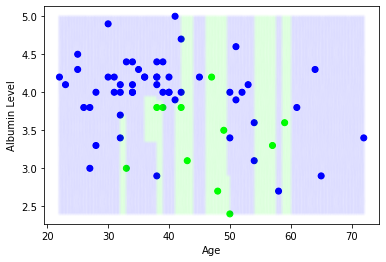

In [ ]:
# Decision Boundaries for Hepatitis: DT

x0v = np.linspace(np.min(X_train[:,0]), np.max(X_train[:,0]), 200)
x1v = np.linspace(np.min(X_train[:,16]), np.max(X_train[:,16]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = DecisionTree(max_depth=50)
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(X_train[:,[0,16]], y_train).predict(x_all)
plt.scatter(X_train[:,0], X_train[:,16], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
plt.xlabel("Age")
plt.ylabel("Albumin Level")
plt.show()

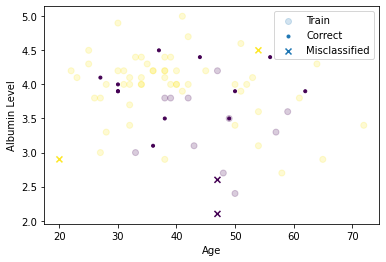

In [ ]:
# Hepatitis KNN Plotting
K = 5
model = KNN(K, dist_fn = euclidean)
y_prob, knns = model.fit(X_train, y_train).predict(X_test)
y_pred = np.argmax(y_prob, axis=-1)
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(X_train[:,0], X_train[:,16], c=y_train, marker='o', alpha=.2, label='Train')
plt.scatter(X_test[correct,0], X_test[correct,16], marker='.', c=y_pred[correct], label='Correct')
plt.scatter(X_test[incorrect,0], X_test[incorrect,16], marker='x', c=y_test[incorrect], label='Misclassified')

plt.xlabel("Age")
plt.ylabel("Albumin Level")
plt.legend(loc='best')
plt.show()

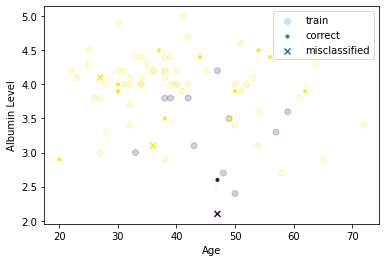

In [ ]:
# Hepatitis DT Plotting
tree = DecisionTree(max_depth=3, cost_fn=gini_cost)
y_test_prob = tree.fit(X_train, y_train).predict(X_test)
y_pred = np.argmax(y_test_prob, axis=-1)

correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(X_train[:,0], X_train[:,16], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(X_test[correct,0], X_test[correct,16], marker='.', c=y_pred[correct], label='correct')
plt.scatter(X_test[incorrect,0], X_test[incorrect,16], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Albumin Level")
plt.show()

## Task 3b: Diabetic Retinopathy Experiments

In [ ]:
# Split Training and Testing with sklearn
X_train, X_test, y_train, y_test = train_test_split(X_diabetic, y_diabetic, test_size = 0.2, random_state=1, shuffle=True)
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 920
Total Number of rows in test: 231


In [ ]:
# KNN on Messidor Dataset with K = 5

model = KNN(5, dist_fn = euclidean)
train_acc, test_acc = model.evaluate_acc(X_train, y_train, X_test, y_test)

print(f'Training Accuracy for K=5: {train_acc}')
print(f'Testing Accuracy for K=5: {test_acc}')

Training Accuracy for K=5: 0.7630434782608696
Testing Accuracy for K=5: 0.5974025974025974


In [ ]:
# DT on Messidor Dataset with max_depth = 10

tree = DecisionTree(max_depth=10, cost_fn=entropy_cost)
train_acc, test_acc = tree.evaluate_acc(X_train, y_train, X_test, y_test)

print(f'Training Accuracy for max_depth=10: {train_acc}')
print(f'Testing Accuracy for max_depth=10: {test_acc}')

Training Accuracy for max_depth=10: 0.8673913043478261
Testing Accuracy for max_depth=10: 0.6060606060606061


best K = 14, test accuracy = 0.6493506493506493


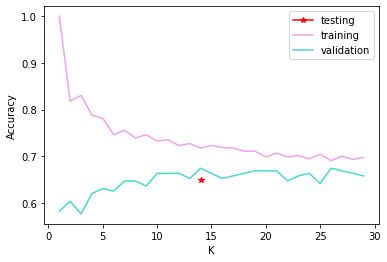

In [ ]:
# Finding best hyperparameter d using 80/20 training/validation split

def best_k_validation(X_train, y_train, X_test, y_test):
    n = X_train.shape[0] // 5
    X_tr, y_tr = X_train[n:], y_train[n:]
    X_valid, y_valid = X_train[:n], y_train[:n]

    model_choices=[]
    train_accs = []
    valid_accs = []

    # Iterate through loop to find best K value
    for k in range(1,30):
        knn = KNN(K=k) 
        model_choices.append(k)
        train_acc, valid_acc = knn.evaluate_acc(X_tr, y_tr, X_valid, y_valid)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

    best_valid_K = model_choices[valid_accs.index(max(valid_accs), 1)]
    knn = KNN(K=best_valid_K)
    _, test_accuracy = knn.evaluate_acc(X_train, y_train, X_test, y_test)

    return (model_choices, best_valid_K, train_accs, valid_accs, test_accuracy)

model_choices, best_valid_K, train_accs, valid_accs, test_accuracy = best_k_validation(X_train, y_train, X_test, y_test)
print(f'best K = {best_valid_K}, test accuracy = {test_accuracy}')
plt.plot(best_valid_K, test_accuracy, marker='*', color='red', label='testing')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, valid_accs, color='#47DBCD', label='validation')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best K = 12, train accuracy = 0.7228260869565217, test accuracy = 0.670995670995671


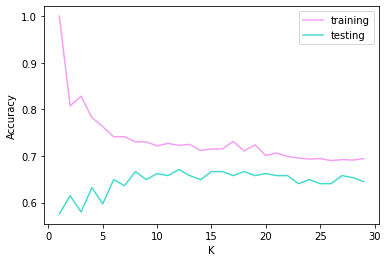

In [ ]:
# Evaluating every K to find true best result

def best_k_testing(X_train, y_train, X_test, y_test):
    model_choices=[]
    train_accs = []
    test_accs = []

    # Iterate through loop to find best K value
    for k in range(1,30):
        knn = KNN(K=k) 
        model_choices.append(k)
        train_acc, test_acc = knn.evaluate_acc(X_train, y_train, X_test, y_test)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

    best_valid_K = model_choices[test_accs.index(max(test_accs))]

    return (model_choices, best_valid_K, train_accs, test_accs)

model_choices, best_valid_K, train_accs, test_accs = best_k_testing(X_train, y_train, X_test, y_test)
print(f'best K = {best_valid_K}, train accuracy = {train_accs[best_valid_K-1]}, test accuracy = {test_accs[best_valid_K-1]}')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, test_accs, color='#47DBCD', label='testing')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best d = 12, test accuracy = 0.6147186147186147


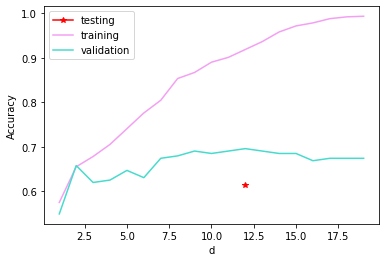

In [ ]:
# Finding best hyperparameter d using 80/20 training/validation split

def best_depth_validation(X_train, y_train, X_test, y_test):
  n = X_train.shape[0] // 5
  X_tr, y_tr = X_train[n:], y_train[n:]
  X_valid, y_valid = X_train[:n], y_train[:n]

  model_choices=[]
  train_accs = []
  valid_accs = []

  # Iterate through loop to find best depth value
  for d in range(1,20):
      tree = DecisionTree(max_depth=d, cost_fn=gini_cost) 
      model_choices.append(d)
      train_acc, valid_acc = tree.evaluate_acc(X_tr, y_tr, X_valid, y_valid)
      train_accs.append(train_acc)
      valid_accs.append(valid_acc)

  best_valid_d = model_choices[valid_accs.index(max(valid_accs))]
  tree = DecisionTree(max_depth=best_valid_d)
  _, test_accuracy = tree.evaluate_acc(X_train, y_train, X_test, y_test)

  return (model_choices, best_valid_d, train_accs, valid_accs, test_accuracy)

model_choices, best_valid_d, train_accs, valid_accs, test_accuracy = best_depth_validation(X_train, y_train, X_test, y_test)
print(f'best d = {best_valid_d}, test accuracy = {test_accuracy}')
plt.plot(best_valid_d, test_accuracy, marker='*', color='red', label='testing')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, valid_accs, color='#47DBCD', label='validation')
plt.xlabel("d")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

best d = 3, train accuracy = 0.675, test accuracy = 0.683982683982684


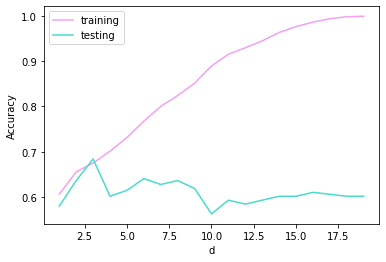

In [ ]:
# Evaluating every d to find true best result

def best_depth_testing(X_train, y_train, X_test, y_test):
  model_choices=[]
  train_accs = []
  test_accs = []

  # Iterate through loop to find best depth value
  for d in range(1,20):
      tree = DecisionTree(max_depth=d, cost_fn=gini_cost) 
      model_choices.append(d)
      train_acc, test_acc = tree.evaluate_acc(X_train, y_train, X_test, y_test)
      train_accs.append(train_acc)
      test_accs.append(test_acc)

  best_valid_d = model_choices[test_accs.index(max(test_accs))]

  return (model_choices, best_valid_d, train_accs, test_accs)

model_choices, best_valid_d, train_accs, test_accs = best_depth_testing(X_train, y_train, X_test, y_test)
print(f'best d = {best_valid_d}, train accuracy = {train_accs[best_valid_d-1]}, test accuracy = {test_accs[best_valid_d-1]}')
plt.plot(model_choices, train_accs, color='#F3A0F2', label='training')
plt.plot(model_choices, test_accs, color='#47DBCD', label='testing')
plt.xlabel("d")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

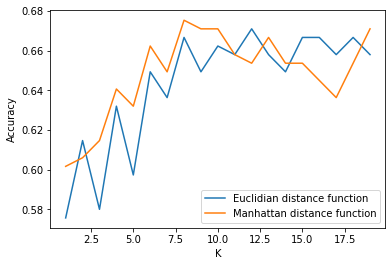

In [ ]:
# Different Distance Functions for KNN

list_K = [i for i in range(1, 20)]
list_acc_euc = []
list_acc_man = []

for k in range(1, 20):
  knn = KNN(K=k, dist_fn=euclidean)
  _, test_acc_euc = knn.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_euc.append(test_acc_euc)
  
  knn = KNN(K=k, dist_fn=manhattan)
  _, test_acc_man = knn.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_man.append(test_acc_man)

plt.plot(list_K, list_acc_euc, label="Euclidian distance function")
plt.plot(list_K, list_acc_man, label="Manhattan distance function")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

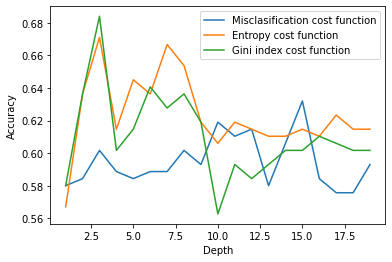

In [ ]:
# Different Cost Functions for DT

list_d = [i for i in range(1, 20)]
list_acc_misc = []
list_acc_entr = []
list_acc_gini = []

for d in range(1, 20):
  tree = DecisionTree(max_depth=d, cost_fn=misclassification_cost)
  _, test_acc_misc = tree.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_misc.append(test_acc_misc)

  tree = DecisionTree(max_depth=d, cost_fn=entropy_cost)
  _, test_acc_entr = tree.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_entr.append(test_acc_entr)

  tree = DecisionTree(max_depth=d, cost_fn=gini_cost)
  _, test_acc_gini = tree.evaluate_acc(X_train, y_train, X_test, y_test)
  list_acc_gini.append(test_acc_gini)

plt.plot(list_d, list_acc_misc, label="Misclasification cost function")
plt.plot(list_d, list_acc_entr, label="Entropy cost function")
plt.plot(list_d, list_acc_gini, label="Gini index cost function")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Find most relevant features
cor_target = abs(diabetic.corr()["CLASS"])
relevant_features = cor_target[cor_target > 0.1]
print(relevant_features)

MA_1           0.292603
MA_2           0.266338
MA_3           0.234691
MA_4           0.197511
MA_5           0.161631
MA_6           0.127861
EXUDATES_11    0.104254
EXUDATES_12    0.142273
EXUDATES_13    0.151424
EXUDATES_14    0.184772
EXUDATES_15    0.177313
CLASS          1.000000
Name: CLASS, dtype: float64


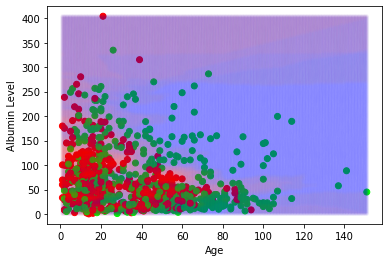

In [ ]:
# Decision Boundaries for Messidor: KNN

x0v = np.linspace(np.min(X_train[:,2]), np.max(X_train[:,2]), 200)
x1v = np.linspace(np.min(X_train[:,8]), np.max(X_train[:,8]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = KNN(K=12)
y_train_prob = np.zeros((y_train.shape[0], 4))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all, _ = model.fit(X_train[:,[2,8]], y_train).predict(x_all)
y_prob_all = np.insert(y_prob_all, -1, np.zeros(y_prob_all.shape[0]), axis=1)
plt.scatter(X_train[:,2], X_train[:,8], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.05)
plt.xlabel("Age")
plt.ylabel("Albumin Level")
plt.show()

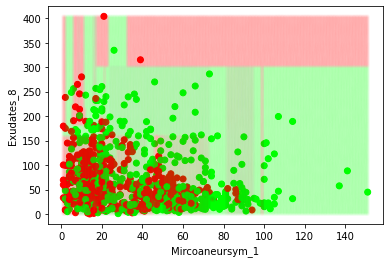

In [ ]:
# Decision Boundaries for Messidor: DT

x0v = np.linspace(np.min(X_train[:,2]), np.max(X_train[:,2]), 200)
x1v = np.linspace(np.min(X_train[:,8]), np.max(X_train[:,8]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

model = DecisionTree(max_depth=10)
y_train_prob = np.zeros((y_train.shape[0], 3))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
y_prob_all = model.fit(X_train[:,[2,8]], y_train).predict(x_all)
plt.scatter(X_train[:,2], X_train[:,8], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.03)
plt.xlabel("Mircoaneursym_1")
plt.ylabel("Exudates_8")
plt.show()

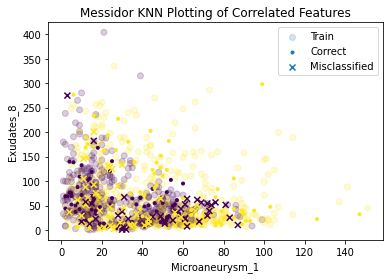

In [231]:
# Messidor KNN Plotting
K = 12
classifier = KNN(K)

y_prob, knns = classifier.fit(X_train, y_train).predict(X_test)
y_pred = np.argmax(y_prob, axis=-1)
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(X_train[:,2], X_train[:,8], c=y_train, marker='o', alpha=.2, label='Train')
plt.scatter(X_test[correct,2], X_test[correct,8], marker='.', c=y_pred[correct], label='Correct')
plt.scatter(X_test[incorrect,2], X_test[incorrect,8], marker='x', c=y_test[incorrect], label='Misclassified')

plt.xlabel("Microaneurysm_1")
plt.ylabel("Exudates_8")
plt.title('Messidor KNN Plotting of Correlated Features')
plt.legend(loc='best')
plt.show()

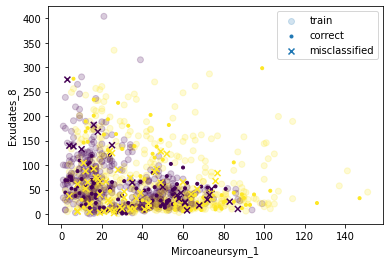

In [ ]:
# Messidor DT Plotting
tree = DecisionTree(max_depth=3, cost_fn=gini_cost)
y_test_prob = tree.fit(X_train, y_train).predict(X_test)
y_pred = np.argmax(y_test_prob, axis=-1)

correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(X_train[:,2], X_train[:,8], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(X_test[correct,2], X_test[correct,8], marker='.', c=y_pred[correct], label='correct')
plt.scatter(X_test[incorrect,2], X_test[incorrect,8], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.xlabel("Mircoaneursym_1")
plt.ylabel("Exudates_8")
plt.show()